In [1]:
from astropy.io import fits

import numpy.ma as ma

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
'''
from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot
'''
import numpy as np

## Import galaxy data

In [3]:
galaxy_ID = '7443-12705'

'''
# With Marvin
image = Image(plateifu=galaxy_ID)
maps = Maps(plateifu=galaxy_ID)
'''

plate, fiber = galaxy_ID.split('-')
#galaxy_data = fits.open('../manga_files/MaNGA_DR15/' + plate + '/manga-' + galaxy_ID + '.Pipe3D.cube.fits.gz')
galaxy_data = fits.open('../data/MaNGA/MaNGA_DR16/HYB10-GAU-MILESHC/' + plate + '/manga-' + galaxy_ID + '-MAPS-HYB10-GAU-MILESHC.fits.gz')

# Extract H-alpha velocity map (C19)
Ha_vel = galaxy_data['EMLINE_GVEL'].data[18]

# Mask extension name
mask_extension = galaxy_data['EMLINE_GVEL'].header['QUALDATA']

In [43]:
galaxy_data.info()

Filename: ../manga_files/MaNGA_DR15/DAP/7443/manga-7443-12705-MAPS-HYB10-GAU-MILESHC.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     146   ()      
  1  SPX_SKYCOO    1 ImageHDU        43   (74, 74, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        46   (74, 74, 3)   float32   
  3  SPX_MFLUX     1 ImageHDU        36   (74, 74)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        37   (74, 74)   float32   
  5  SPX_SNR       1 ImageHDU        34   (74, 74)   float32   
  6  BINID         1 ImageHDU        45   (74, 74, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        43   (74, 74, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        46   (74, 74, 3)   float32   
  9  BIN_AREA      1 ImageHDU        35   (74, 74)   float32   
 10  BIN_FAREA     1 ImageHDU        34   (74, 74)   float32   
 11  BIN_MFLUX     1 ImageHDU        37   (74, 74)   float32   
 12  BIN_MFLUX_IVAR    1 ImageHDU        38   (74, 74)   float32   
 

In [44]:
galaxy_data['EMLINE_GVEL'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                   22                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                 38.0 / Pixel coordinate of reference point            
CRPIX2  =                 38.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
PC1_1   =         -0.0001388

## Mask "bad" data

Not needed if using Marvin

In [4]:
mHa_vel = ma.array(Ha_vel, mask=galaxy_data[mask_extension].data[18] > 0)

## Plot velocity map

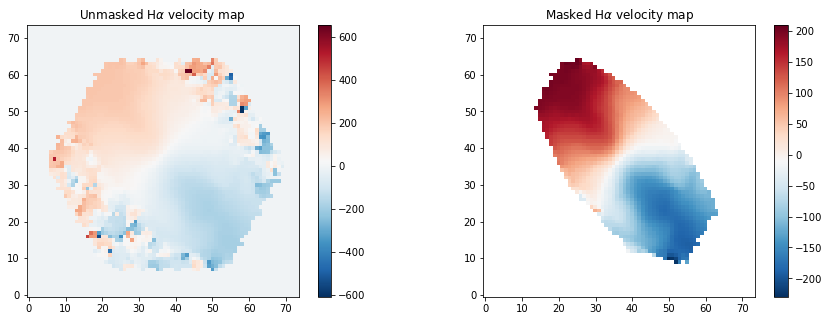

In [11]:
%matplotlib inline

'''
# With Marvin
ha_vel = maps.emline_gval_ha_6564
ha_vel.plot()
'''

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title(r'Unmasked H$\alpha$ velocity map')
plt.imshow(Ha_vel, cmap='RdBu_r', origin='lower')
plt.colorbar()

plt.subplot(122)
plt.title(r'Masked H$\alpha$ velocity map')
plt.imshow(mHa_vel, cmap='RdBu_r', origin='lower')
plt.colorbar();

## Display color image

Marvin ONLY

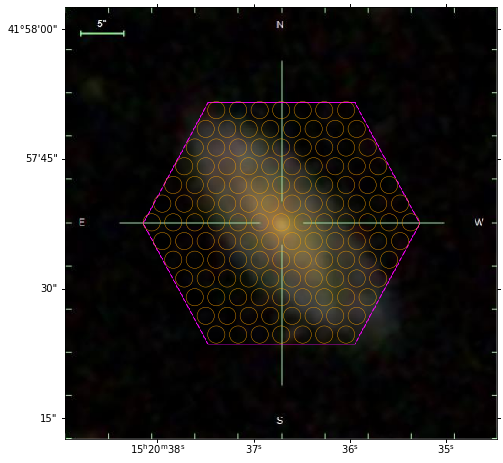

In [3]:
ax = image.plot()

# Overlay fibers
image.overlay_fibers(ax)

In [4]:
mask_extension

'EMLINE_GVEL_MASK'